In [ ]:
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization


import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#xtrain
!gdown 1Ju3Jh4-6nibJBw1vNanoeMjg7guv4LC0
#xtest
!gdown 1zgDFsdR5UnV97yQpaeN9vt-9SebqD5BG
#ytrain
!gdown 1-0kR3aHlVtnE1tAN8GHeV_IkZxEHH-Zj
#ytest
!gdown 1-1zy0SEd3BE4dPTL7_EROKh5cxIFiFTw

with open('1조_datasetx_train.pickle', 'rb') as f: # 피클파일 로드
    x_train = pickle.load(f)
with open('1조_datasety_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open('1조_datasetx_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open('1조_datasety_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

Downloading...
From: https://drive.google.com/uc?id=1Ju3Jh4-6nibJBw1vNanoeMjg7guv4LC0
To: /content/1조_datasetx_train.pickle
100% 677M/677M [00:02<00:00, 264MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zgDFsdR5UnV97yQpaeN9vt-9SebqD5BG
To: /content/1조_datasetx_test.pickle
100% 75.3M/75.3M [00:00<00:00, 246MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0kR3aHlVtnE1tAN8GHeV_IkZxEHH-Zj
To: /content/1조_datasety_train.pickle
100% 36.1k/36.1k [00:00<00:00, 68.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1zy0SEd3BE4dPTL7_EROKh5cxIFiFTw
To: /content/1조_datasety_test.pickle
100% 4.15k/4.15k [00:00<00:00, 9.45MB/s]


In [ ]:
# 데이터를 나눌 크기 설정
n = int(len(x_train))  # 예를 들어, 전체 훈련 데이터의 절반을 사용
m = int(len(x_test))   # 예를 들어, 전체 테스트 데이터의 절반을 사용

# 데이터를 나눔
train_images = x_train[:n]
train_labels = y_train[:n]

test_images = x_test[:m]
test_labels = y_test[:m]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()

    # Convolutional Layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))



    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())


    # Output Layer
    model.add(layers.Dense(1, activation='softmax'))

    return model


In [ ]:
model = create_model()

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.000005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

NameError: ignored

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
x_train.shape

(4499, 224, 224, 3)

In [ ]:
y_train.shape

(4499,)

In [ ]:
x_test.shape

(500, 224, 224, 3)

In [ ]:
model.fit(x_train, y_train,epochs=50,
          validation_data=(x_test,y_test), verbose=1, batch_size=256,callbacks=[early])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 458s 25s/step - loss: 0.0000e+00 - accuracy: 0.1994 - val_loss: 0.0000e+00 - val_accuracy: 0.2060
Epoch 2/50
18/18 [==============================] - 457s 25s/step - loss: 0.0000e+00 - accuracy: 0.1994 - val_loss: 0.0000e+00 - val_accuracy: 0.2060
Epoch 3/50
18/18 [==============================] - 461s 26s/step - loss: 0.0000e+00 - accuracy: 0.1994 - val_loss: 0.0000e+00 - val_accuracy: 0.2060
Epoch 4/50
18/18 [==============================] - 455s 25s/step - loss: 0.0000e+00 - accuracy: 0.1994 - val_loss: 0.0000e+00 - val_accuracy: 0.2060


In [ ]:
base_model = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 49225217

In [ ]:
train_images.shape

(4499, 224, 224, 3)

In [ ]:
test_images.shape

(500, 224, 224, 3)

In [ ]:
train_labels.shape

(4499,)

In [ ]:
test_labels.shape

(500,)

In [ ]:
model.fit(train_images, train_labels, epochs = 5, validation_data=(test_images, test_labels),
                   batch_size= 125)

Epoch 1/5


In [ ]:
model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
train_images.shape

(4499, 224, 224, 3)

In [ ]:
train_labels.shape

(4499,)

In [ ]:
test_images.shape

(500, 224, 224, 3)

In [ ]:
test_labels.shape

(500,)

In [ ]:
# 레이블 데이터(y_train, y_test)에 대한 원핫 인코딩
train_labels = tf.keras.utils.to_categorical(y_train, 5)
test_labels = tf.keras.utils.to_categorical(y_test, 5)

# 입력 데이터(x_train, x_test)는 원핫 인코딩하지 않음
train_images = x_train
test_images = x_test

In [ ]:
## 일부 재학습 모델
base_model = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

# base_model.trainable = False

# for layer in base_model.layers[-10:]:
#     layer.trainable = True

base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False


inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

In [ ]:
history=model.fit(train_images, train_labels, epochs = 20, validation_data=(test_images, test_labels),
                   batch_size= 125,callbacks=[early,reduce_lr])

Epoch 1/20
36/36 [==============================] - 1252s 35s/step - loss: 0.1646 - accuracy: 0.9475 - val_loss: 1.0033 - val_accuracy: 0.6620 - lr: 1.0000e-04
Epoch 2/20
36/36 [==============================] - 1265s 35s/step - loss: 0.1404 - accuracy: 0.9578 - val_loss: 1.0317 - val_accuracy: 0.6840 - lr: 1.0000e-04
Epoch 3/20
36/36 [==============================] - 1257s 35s/step - loss: 0.1127 - accuracy: 0.9642 - val_loss: 1.0359 - val_accuracy: 0.6700 - lr: 1.0000e-04
Epoch 4/20
36/36 [==============================] - 1258s 35s/step - loss: 0.0887 - accuracy: 0.9742 - val_loss: 1.0665 - val_accuracy: 0.6640 - lr: 1.0000e-04


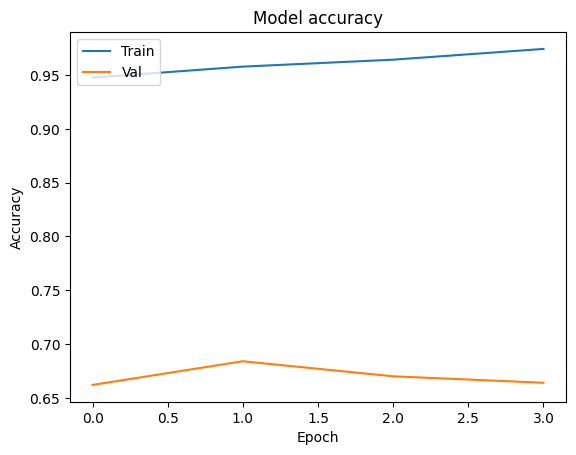

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

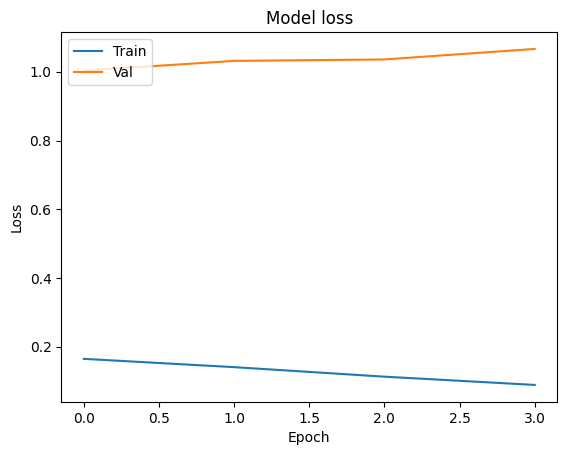

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()